# Which Game Has the Most Potential?

This project will analyze data for an online store called "Ice," which sells video games worldwide.

This analysis aims to identify patterns that determine whether a game can be considered successful or not, to find which game has the most potential.

The main stages of this data analysis include:
1. Preparing the data and understanding the information
2. Analyzing the data
3. Testing the hypotheses

# Preprocessing

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
import seaborn as sns

## Importing Data

In [2]:
# Muat file data menjadi DataFrame
data = pd.read_csv('/datasets/games.csv')

## Explore and Load Data

**Data Description**

This dataset contains the following columns:

- `Name`: The name of the game.
- `Platform`: The platform on which the game is available.
- `Year_of_Releas`: The year the game was released.
- `Genre`: The genre or category of the game.
- `NA_sales`: Sales in North America in millions of USD.
- `EU_sales`: Sales in Europe in millions of USD.
- `JP_sales`: Sales in Japan in millions of USD.
- `Other_sales`: Sales in other countries in millions of USD.
- `Critic_Score`: Review score from critics, with a maximum of 100.
- `User_Score`: Review score from users, with a maximum of 10.
- `Rating (ESRB)`: The ESRB rating of the game.
  
Note: Data for the year 2016 may be incomplete.

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# tampilkan sampel data
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


It can be seen from the initial results of the data loaded that data improvements are needed, such as:
1. Replace all changed column names to lowercase
2. Changing the data type in the column;
 - `Year_of_Release` to *integer*
 - `User_Score` to *float*
3. Filling in missing values ​​in several columns `name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating`

## Fixing Data

### Fixed spelling logging

In [6]:
# Memperbaiki pencatatan ejaan
data.columns = data.columns.str.lower()
data.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Addressing Missing Values

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Name
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data = data.dropna(subset=['name'], axis=0)
data = data.reset_index(drop=True)
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


For *missing values* in the `name` column, the dropna() method is used which is considered very appropriate because only 2 rows are missing.

In [11]:
# year_of_release
data[data.year_of_release.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [12]:
# cek median year_of_release per platform
median_year_platform = data.groupby('platform')['year_of_release'].median()
median_year_platform['GBA']

2003.0

In [13]:
median_year_platform

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [14]:
# mengisi nilai kosong year_of_release
data['year_of_release'] = data.apply(lambda x: median_year_platform[x.platform] if
                                    pd.isna(x.year_of_release) else x.year_of_release, axis=1)

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


To fill in the *missing value* in the `year_of_release` column, look at the median `platform` value, which can be assumed to be that year. This can be used to fill in the *missing value* in the `year_of_release` column according to the year of each game platform.

In [17]:
# mengisi nilai kosong user_score
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Before filling in the missing values, first change the TBD value to NaN using the np.nan method, because the TBD value is categorized as missing data. Next, fill in the *missing value* in the `user_score` column by leaving the value NaN because there are certain platform and genre combinations for which there is no user_score, for which we cannot calculate the median value.

In [20]:
# mengisi nilai kosong critic_score
data[data.critic_score.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [21]:
# mengisi nilai kosong rating
data[data.rating.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


After repeated checking and analysis of both *missing values* for the `critic_score` and `rating` columns, the best option to deal with *missing values* in these two columns is to leave the value NaN because there is a combination of `platform`-`genre ` or `platform`-`year_of_release` found that many of these two columns had no values, so we could not calculate the median value to fill in the missing values.

### Changing Data Type

In [22]:
# Memperbaiki tipe data year_of_release
data['year_of_release'] = pd.to_numeric(data['year_of_release']).astype(int)
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [23]:
# Memperbaiki tipe data user_score
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Calculating Total Sales

In [24]:
# Total penjualan
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Data analysis

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

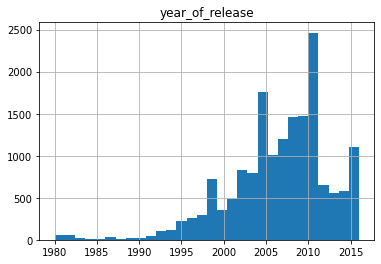

In [25]:
# Berapa banyak game yang dirilis pada tahun yang berbeda.
#Apakah data di setiap periode signifikan?
data.hist('year_of_release', bins=30)

As can be seen from the results displayed, since 2000 the number of games has tended to show an increase. However, the peak was around 2010 when many games were released.

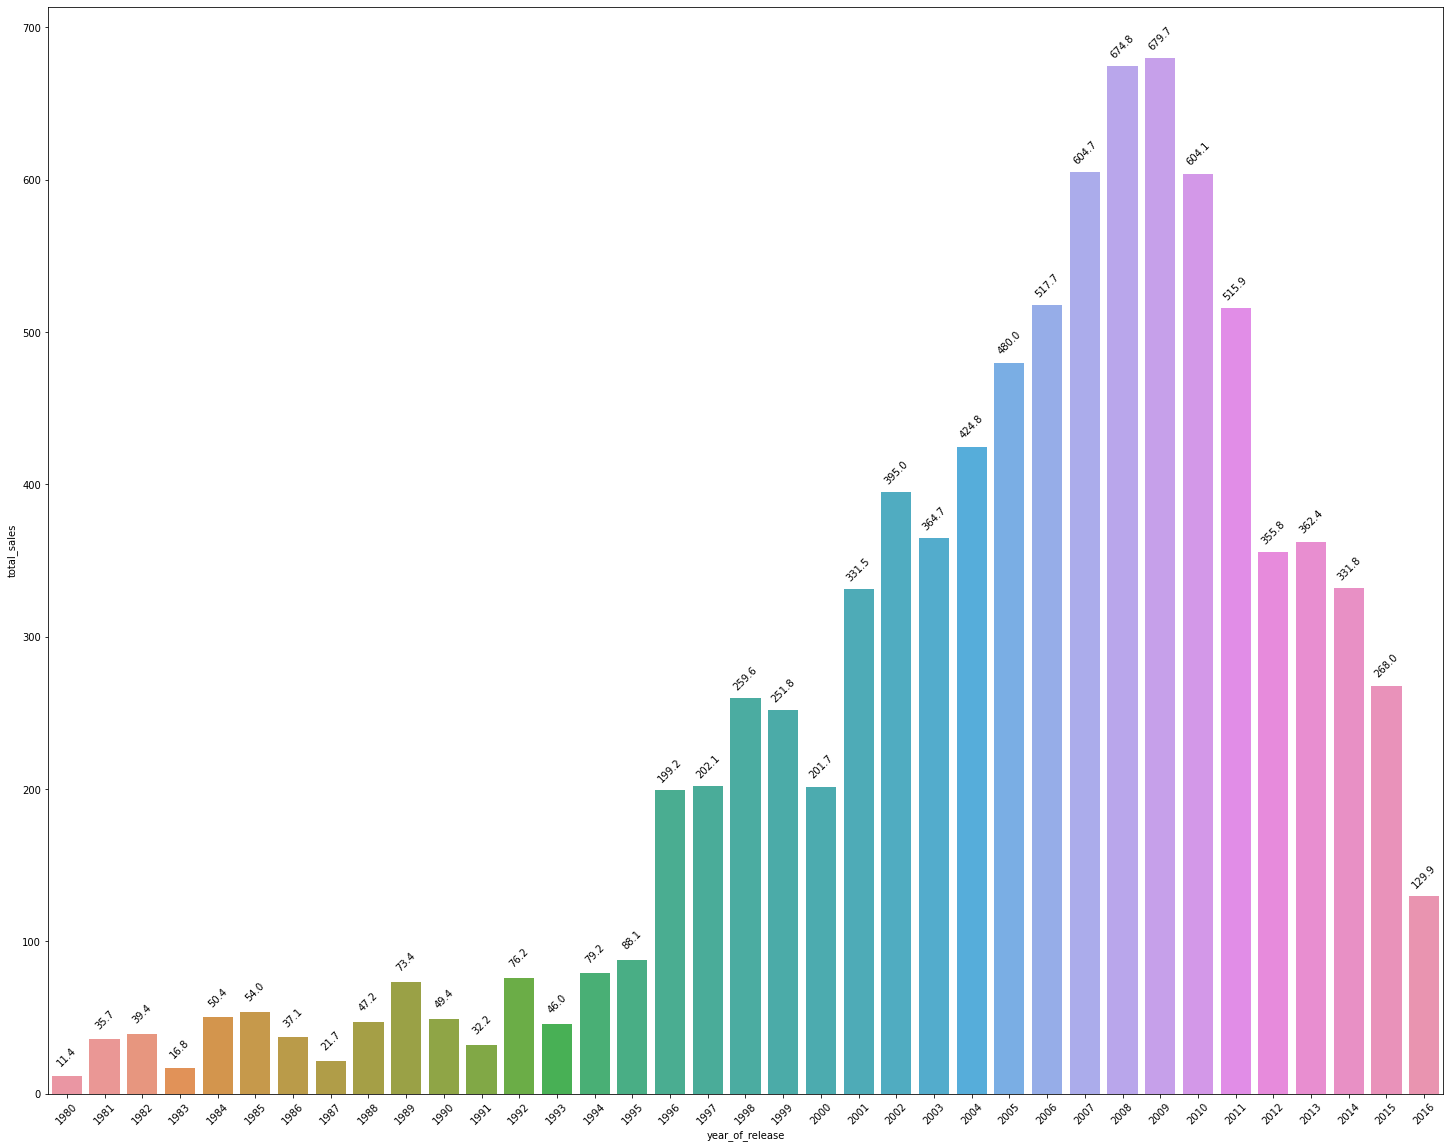

In [26]:
# Variasi penjualan platform ke platform lainnya.
plt.figure(figsize=(25,20))
game_per_year = data.groupby('year_of_release')['total_sales'].agg('sum').reset_index().sort_values(by = 'year_of_release')
splot = sns.barplot(data=game_per_year, x='year_of_release', y='total_sales')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

In [27]:
data_final = data[data['year_of_release'] >= 2012]
graph_by_platform = data_final.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')\
                    .reset_index()
graph_by_platform.head()

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,57.76
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


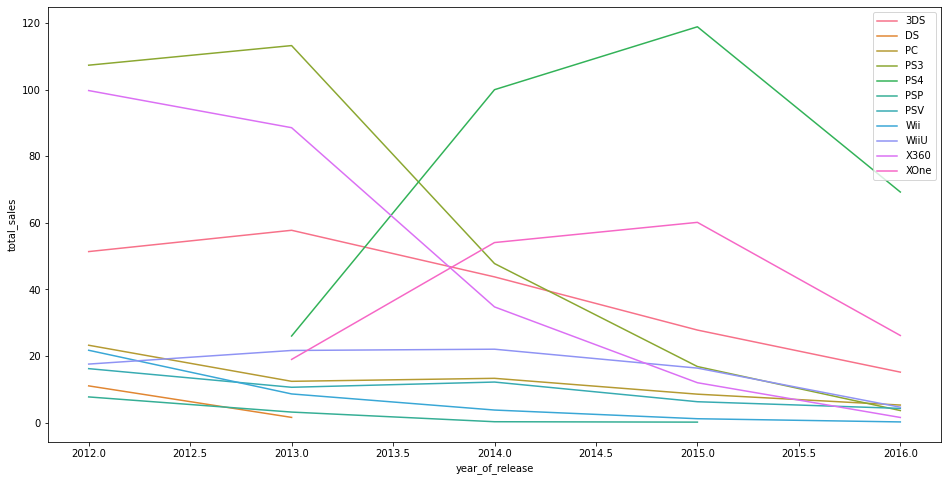

In [28]:
plt.subplots(figsize=(16, 8))
sns.lineplot(data = graph_by_platform, x='year_of_release', y='total_sales', hue='platform')
plt.legend(loc= 0)

<AxesSubplot:xlabel='year_of_release'>

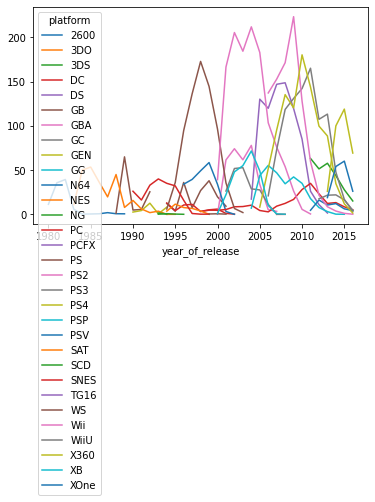

In [92]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line')

From the line graph results above, there are around 10 platforms because a dataframe that has been filtered for years >= 2012 is used. For the `legend` value, set the parameter to loc=0, this means that the legend of our graph is placed in the best location so that it doesn't block the graph.

<AxesSubplot:xlabel='platform'>

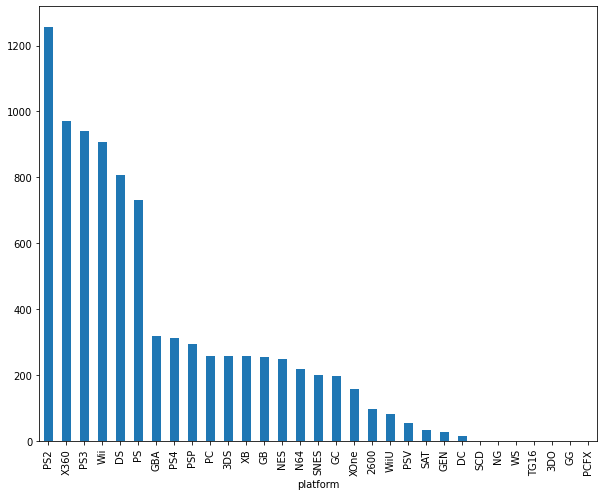

In [29]:
# Penjualan per platform
plt.figure(figsize=(10,8))
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

In terms of sales based on `total_sales`, it can be seen that there are the top 5 games (PS2, X360, PS3, Wii, DS). It can also be seen below, showing the results of the highest sales in around 10-11 years, namely at:
- PS2 from 2001 - 2005 (5 years)
- X360 from 2008 - 2011 (4 years)
- PS3 from 2008 - 2011 (4 years)
- Wii from the initial year of publication 2006 - 2009 (4 years)
- DS from 2005 - 2008 (4 years)

In [30]:
# Cek penjualan per tahun u/ PS2, X360 dan PS3
def sales_per_platform(datas, platform):
    data_filter = datas[datas['platform'] == platform]
    data_filter.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')

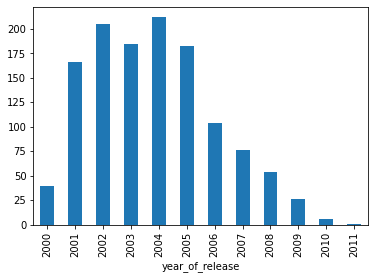

In [31]:
sales_per_platform(data, 'PS2')

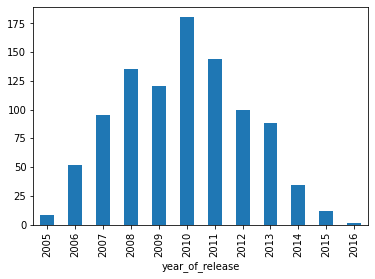

In [32]:
sales_per_platform(data, 'X360')

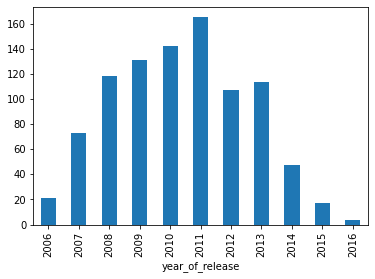

In [33]:
sales_per_platform(data, 'PS3')

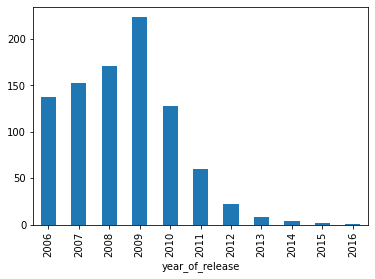

In [34]:
sales_per_platform(data, 'Wii')

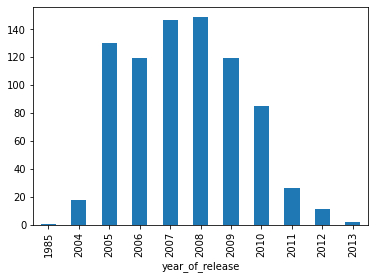

In [35]:
sales_per_platform(data, 'DS')

The time required for a new platform to appear is:
- PS2 in 1 year.
- X360 experienced a rise in several years before appearing after approximately 3-4 years.
- PS3 within 2 years.

In [36]:
# periode waktu pengambilan data
data_final = data[data['year_of_release'] >= 2012]
data_final.shape

(2895, 12)

Based on variations in platform sales, an analysis of data taken from 2012 was carried out only because it was more relevant according to the assumption that in 2012 the pattern would not experience much change.

<AxesSubplot:xlabel='platform'>

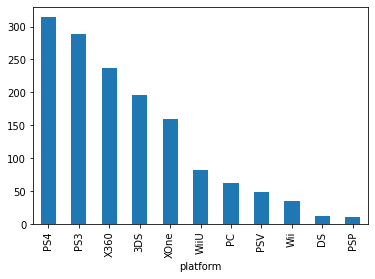

In [37]:
# Penjualan per platform
data_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

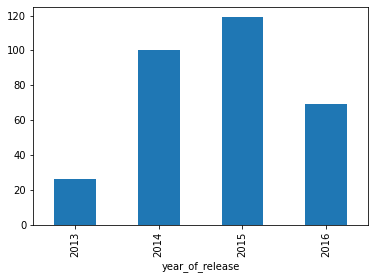

In [38]:
sales_per_platform(data_final, 'PS4')

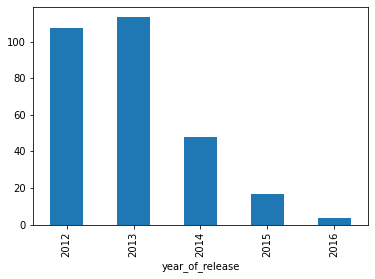

In [39]:
sales_per_platform(data_final, 'PS3')

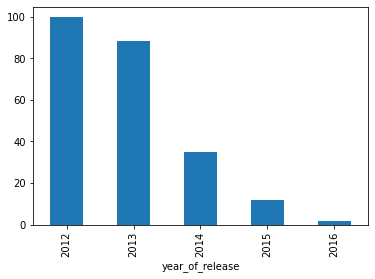

In [40]:
sales_per_platform(data_final, 'X360')

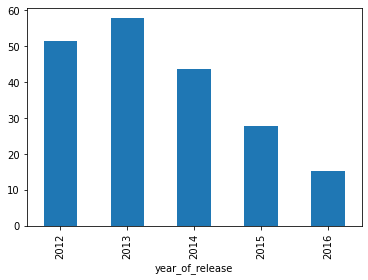

In [41]:
sales_per_platform(data_final, '3DS')

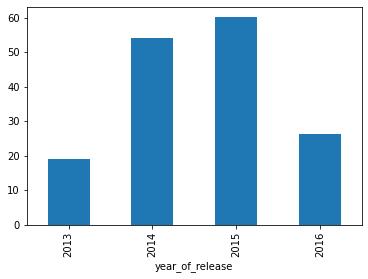

In [42]:
sales_per_platform(data_final, 'XOne')

Look at annual sales for:
- PS4's overall growth is positive despite fluctuations.
- PS3 is starting to decline
- X360 experienced a drastic decline in 2014.
- 3SD experienced a decline after reaching its highest peak in sales in 2013.
- XOne experienced positive growth in the first 3 years until 2015 before experiencing a drastic decline in 2016.

In [43]:
data_top_platforms = data_final[data['platform'].isin(['PS4', 'PS3', 'X360'])]
data_top_platforms.head()

/tmp/ipykernel_43/650075606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_top_platforms = data_final[data['platform'].isin(['PS4', 'PS3', 'X360'])]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

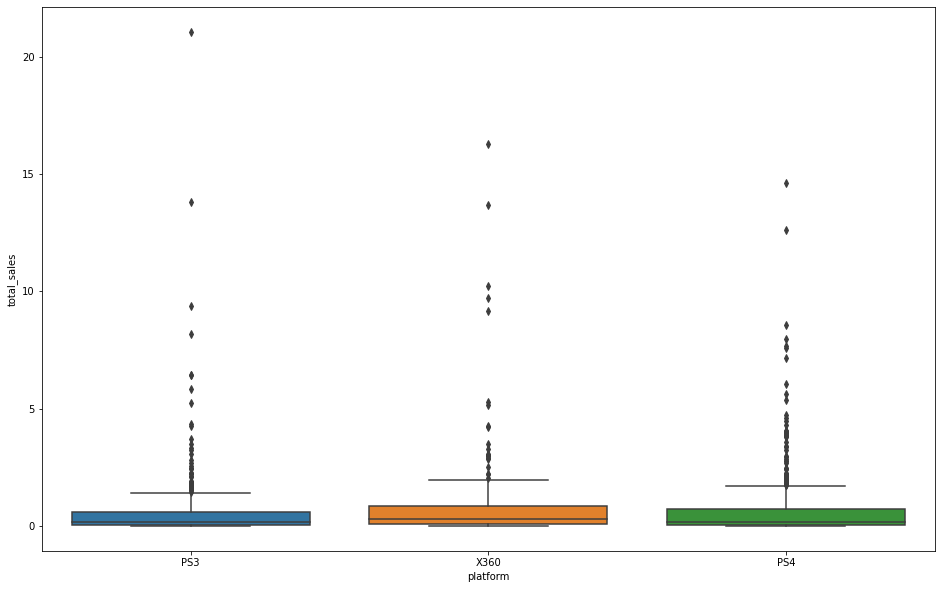

In [44]:
#boxplot untuk penjualan global
plt.figure(figsize=(16, 10))
sns.boxplot(data= data_top_platforms, x='platform', y='total_sales')

From all the top games, it shows that there are quite a lot of *outliers* which means the games above are very popular. It can be seen that there is one game (PS3) whose total sales are above 20 million USD.

In [45]:
# Pivot table untuk cek median dan mean total_sales berdasarakan platform
data_top_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean'])

,median,mean
,total_sales,total_sales
platform,,
PS3,0.20,0.585781
PS4,0.20,0.801378
X360,0.31,0.810068


In [46]:
x_360 = data_final[data_final['platform'] == 'X360']
x_360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16448,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16458,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16489,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16611,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

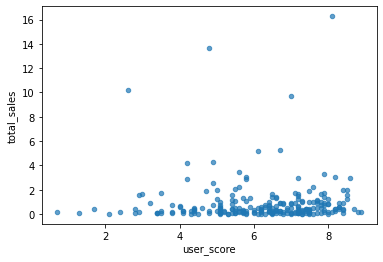

In [47]:
x_360.plot.scatter(y='total_sales', x='user_score', alpha=.7)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

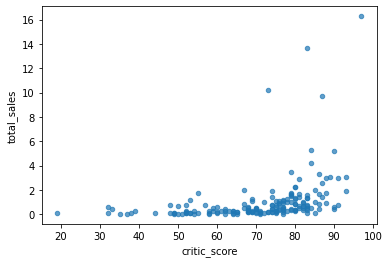

In [48]:
x_360.plot.scatter(y='total_sales', x='critic_score', alpha=.7)

Both the graph and the correlation look low, where the higher the `user_score` or `critic_score`, the higher the `total_sales`. In other words, the correlation value is close to zero or almost no correlation at all.

In [49]:
#buat pivot table indexnya (name. platform)
#buat barplot untuk cek penjualan game (total_sales) yg ada di multiple platform.


In [50]:
data_final[data_final['name'] == 'Minecraft']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
261,Minecraft,PS4,2014,Misc,1.48,2.02,0.14,0.68,NaN,NaN,NaN,4.32
543,Minecraft,XOne,2014,Misc,1.61,0.90,0.00,0.25,NaN,NaN,NaN,2.76
867,Minecraft,PSV,2014,Misc,0.18,0.64,0.90,0.24,NaN,NaN,NaN,1.96
2972,Minecraft,WiiU,2016,Misc,0.28,0.17,0.18,0.04,NaN,NaN,NaN,0.67


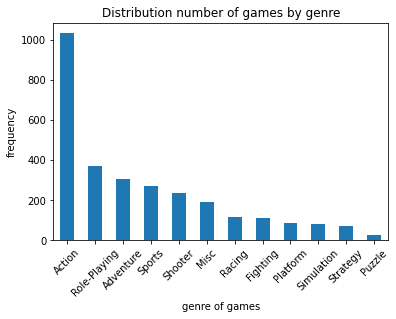

In [51]:
# Game distribution berdasarkan genre
data_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution number of games by genre')
plt.xlabel('genre of games')
plt.xticks(rotation=45)
plt.ylabel('frequency');

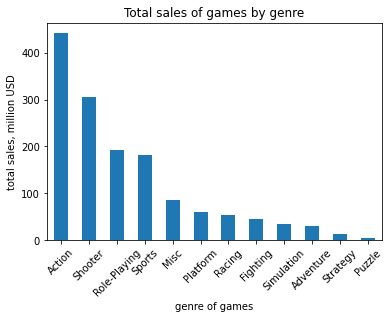

In [52]:
data_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total sales of games by genre')
plt.xlabel('genre of games')
plt.xticks(rotation=45)
plt.ylabel('total sales, million USD');

**Comparing sales of the same game on other platforms**

The number of Action games is greater, as are the total sales (many sold amounting to 450 million USD) compared to other types or genres of games. However, for other types such as Shooter, it is in 5th place out of the total game types, which is around 300, but for total sales it is in 2nd place, around 300 million USD.

So, to generalize regarding the most popular genre, namely Action and also the most profitable. However, Shooter in terms of sales reaching 300 million USD is also the 2nd most profitable. So future sales strategies can be focused more on these two types of games (Action and Shooter).

# User Profiling For Each Region

**5 platform teratas di wilayah (NA, EU, JP)**


In [53]:
def sales_platform_area(area):
    data_1 = data_final.groupby('platform')[area].sum().reset_index().sort_values(by=area, ascending=False)
    data_1['market_share'] = (data_1[area]/data_1[area].sum()) * 100
    return data_1.head()

In [54]:
# NA
cek_na = sales_platform_area('na_sales')
cek_na

,platform,na_sales,market_share
9,X360,140.05,23.660292
4,PS4,108.74,18.370726
3,PS3,103.38,17.465198
10,XOne,93.12,15.731856
0,3DS,56.15,9.486079


<AxesSubplot:xlabel='platform'>

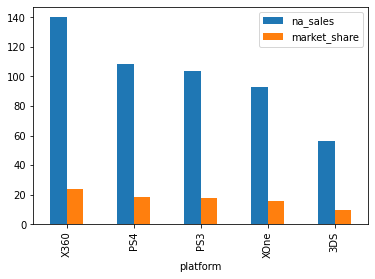

In [55]:
cek_na.plot(x='platform', kind='bar')

In [56]:
# EU
cek_eu = sales_platform_area('eu_sales')
cek_eu

,platform,eu_sales,market_share
4,PS4,141.09,27.824012
3,PS3,106.86,21.073598
9,X360,74.52,14.695906
10,XOne,51.59,10.173937
0,3DS,42.85,8.450343


<AxesSubplot:xlabel='platform'>

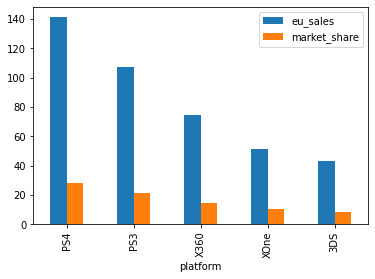

In [57]:
cek_eu.plot(x='platform', kind='bar')

In [58]:
# JP
cek_jp = sales_platform_area('jp_sales')
cek_jp

,platform,jp_sales,market_share
0,3DS,87.84,45.583809
3,PS3,35.29,18.313441
6,PSV,21.11,10.954852
4,PS4,15.96,8.282304
8,WiiU,13.01,6.751427


<AxesSubplot:xlabel='platform'>

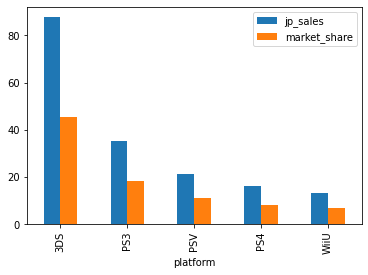

In [59]:
cek_jp.plot(x='platform', kind='bar')

/tmp/ipykernel_43/4090217456.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_final.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='platform', ascending=False).plot(kind='bar')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


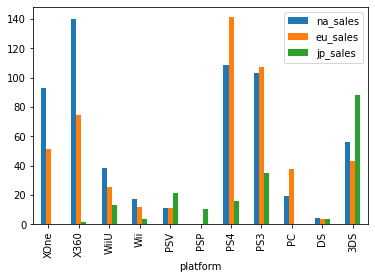

In [60]:
data_final.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='platform', ascending=False).plot(kind='bar')
data_final.head()

From the top 5 platforms in 3 regions, it can be concluded:
1. X360 in the NA region dominates market_share at around 23.7%, which is then followed by PS4, PS3, XOne and 3DS.
2. In the EU region, PS4 dominates the sales market at 27.8%, followed by PS3, X360, XOne and 3DS.
3. In contrast to the two regions above, 3DS, which is in the bottom 5 in the other two regions, dominates or dominates the selling market in JP at 45.6%, followed by PS3, PSV, PS4 and WiiU.

In both regions, namely NA and EU, they have the same 5 types of platforms, the difference being that in the NA region X360 is ranked 1st, while in the EU region PS4 is top 1, however for the 3DS type in both regions it is both ranked 5th.
Meanwhile, for the JP region, the platform type is slightly different from NA or EU. 3DS, which previously ranked 5th in the NA and EU regions, is ranked first in the JP region.

**Top 5 genres in regions (NA, EU, JP)**

In [61]:
def sales_genre_area(area):
    data_1 = data_final.groupby('genre')[area].sum().reset_index().sort_values(by=area, ascending=False)
    data_1['market_share'] = (data_1[area]/data_1[area].sum()) * 100
    return data_1.head()

In [62]:
# NA
cek_na_genre = sales_genre_area('na_sales')
cek_na_genre

,genre,na_sales,market_share
0,Action,178.02,30.075010
8,Shooter,144.81,24.464455
10,Sports,81.53,13.773821
7,Role-Playing,64.11,10.830856
3,Misc,38.19,6.451885


<AxesSubplot:xlabel='genre'>

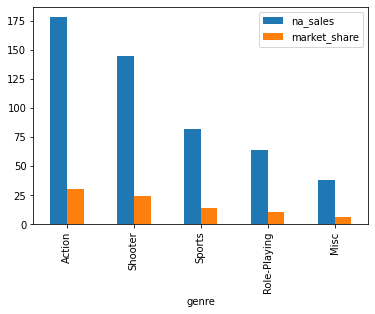

In [63]:
cek_na_genre.plot(x='genre', kind='bar')

In [64]:
# EU
cek_eu_genre = sales_genre_area('eu_sales')
cek_eu_genre

,genre,eu_sales,market_share
0,Action,159.53,31.460519
8,Shooter,113.49,22.381084
10,Sports,69.09,13.625069
7,Role-Playing,48.58,9.580342
6,Racing,27.29,5.381794


<AxesSubplot:xlabel='genre'>

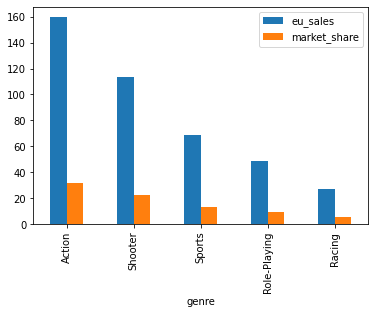

In [65]:
cek_eu_genre.plot(x='genre', kind='bar')

In [66]:
# JP
cek_jp_genre = sales_genre_area('jp_sales')
cek_jp_genre

,genre,jp_sales,market_share
7,Role-Playing,65.54,34.011417
0,Action,52.80,27.400104
3,Misc,12.86,6.673586
9,Simulation,10.41,5.402180
2,Fighting,9.44,4.898806


<AxesSubplot:xlabel='genre'>

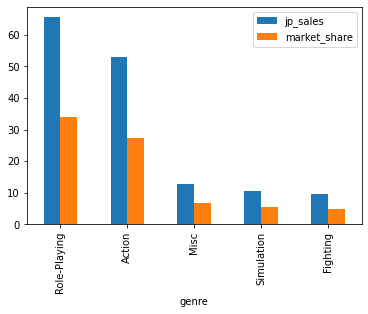

In [67]:
cek_jp_genre.plot(x='genre', kind='bar')

/tmp/ipykernel_43/2503745012.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_final.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='genre', ascending=False).plot(kind='bar')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


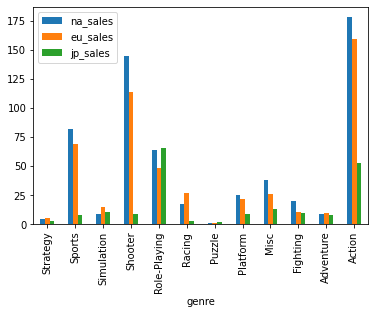

In [68]:
# visualisasi semua wilayah
data_final.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='genre', ascending=False).plot(kind='bar')
data_final.head()

From the top 5 genres in 3 regions, it can be concluded:
1. For both NA and EU regions, games with the *Action* genre are ranked 1st, with a difference of 1.5% in market_share, which is then followed by the Shooter, Sports, and Role-Playing genres which are ranked 4th, but different for game genres in 5th position, namely Misc and Racing.
2. The JP region always has differences from the previous two regions, where in JP Role-Playing is ranked 1st at 34%, followed by Action, Misc, Simulation and Fighting.


**ESRB rating in each region**

In [69]:
def sales_rating_area(area):
    data_1 = data_final.groupby('rating')[area].sum().reset_index().sort_values(by=area, ascending=False)
    data_1['market_share'] = (data_1[area]/data_1[area].sum()) * 100
    return data_1.head()

In [70]:
# NA
cek_na_rating = sales_rating_area('na_sales')
cek_na_rating

,rating,na_sales,market_share
2,M,231.57,47.420802
0,E,114.49,23.445211
1,E10+,75.96,15.555055
3,T,66.31,13.578932


<AxesSubplot:xlabel='rating'>

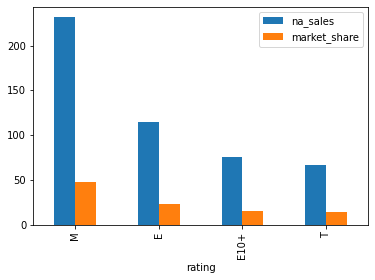

In [71]:
cek_na_rating.plot(x='rating', kind='bar')

In [72]:
# EU
cek_eu_rating = sales_rating_area('eu_sales')
cek_eu_rating

,rating,eu_sales,market_share
2,M,193.96,46.672121
0,E,113.05,27.202945
1,E10+,55.56,13.369267
3,T,53.01,12.755667


<AxesSubplot:xlabel='rating'>

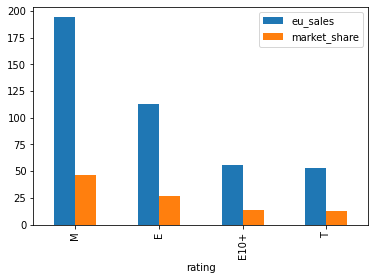

In [73]:
cek_eu_rating.plot(x='rating', kind='bar')

In [74]:
# JP
cek_jp_rating = sales_rating_area('jp_sales')
cek_jp_rating

,rating,jp_sales,market_share
0,E,28.33,33.802649
3,T,26.09,31.129937
2,M,21.20,25.295311
1,E10+,8.19,9.772104


<AxesSubplot:xlabel='rating'>

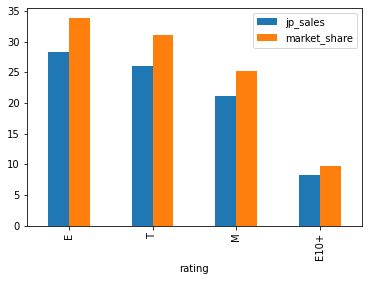

In [75]:
cek_jp_rating.plot(x='rating', kind='bar')

/tmp/ipykernel_43/3425462243.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_final.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='rating', ascending=False).plot(kind='bar')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


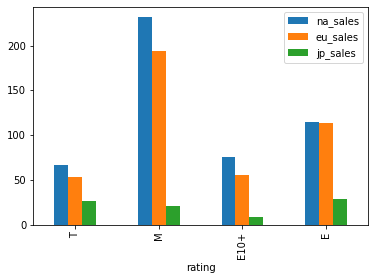

In [76]:
data_final.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='rating', ascending=False).plot(kind='bar')
data_final.head()

Ratings for sales in each region can be concluded:

1. For both NA and EU regions, the game rating (M) is ranked 1st, followed by ratings E, E10+ and T with a difference of only 0.8% in market_share.
2. Different from the rating in the JP region, where games rated E are ranked first at 33.8%, a difference of 6% from the NA and EU regions.

# Hypothesis testing

- H0 = The average user rating of the Xbox One and PC platforms is the same.
- H1 = The average user rating of the Xbox One and PC platforms is different.

1. Determine H0 and H1
2. Determine alpha, default alpha value 5%
3. Carry out statistical tests (student t-test independent 2 samples)
4. Compare the p-value of the statistical test results with the alpha value

In [77]:
sample_1 = data_final[data_final['platform'] == 'XOne'].dropna()['user_score']
sample_2 = data_final[data_final['platform'] == 'PC'].dropna()['user_score']

In [78]:
sample_1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16262    8.1
16312    3.1
16390    6.3
16595    6.0
16628    8.2
Name: user_score, Length: 159, dtype: float64

In [79]:
sample_2

192      4.0
458      3.9
687      7.9
958      4.8
1094     7.9
        ... 
16278    7.3
16461    6.8
16507    7.9
16582    7.9
16690    7.6
Name: user_score, Length: 174, dtype: float64

In [80]:
#uji levene untuk cek apakah varians samepl sama.
st.levene(sample_1, sample_2)

LeveneResult(statistic=8.47272724881896, pvalue=0.0038494473989192884)

In [81]:
# Uji hipotesisnya
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

In [82]:
results.pvalue

0.41668656393474524

In [83]:
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Kita gagal menolak null hypothesis


**Explanation**

Hypothesis H0 is sample_1 average = sample_2 average.
And for the alternative hypothesis (H1) is the average of sample_1 != average of sample_2.

The results show a p-value of 0.4167 (greater than the alpha value), which means it fails to reject H0, which means that the average Xbox One user is the same as a PC.

- H0 = The average user rating for the Action and Sports genres is the same.
- H1 = The average user rating for the Action and Sports genres is different.

In [84]:
sample_3 = data_final[data_final['genre'] == 'Action'].dropna()['user_score']
sample_4 = data_final[data_final['genre'] == 'Sports'].dropna()['user_score']

In [85]:
sample_3

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16528    5.5
16582    7.9
16595    6.0
16650    8.5
16690    7.6
Name: user_score, Length: 423, dtype: float64

In [86]:
sample_4

77       4.3
94       5.0
126      4.3
143      5.7
271      4.2
        ... 
15405    3.7
15837    6.0
16118    6.3
16144    6.9
16228    5.5
Name: user_score, Length: 136, dtype: float64

In [87]:
#uji levene untuk cek apakah varians samepl sama.
st.levene(sample_3, sample_4)

LeveneResult(statistic=1.1698589278224438, pvalue=0.27989827368559317)

In [88]:
# Uji hipotesisnya
alpha = 0.05
results = st.ttest_ind(sample_3, sample_4, equal_var=False)

In [89]:
results.pvalue

4.880249484559985e-13

In [90]:
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


H0 hypothesis is sample_3 average = sample_4 average. And for the alternative hypothesis (H1) is the average of sample_3 != average of sample_4.

It can be seen that the results of the p-value are 4.88x10<sup>-13</sup> (much smaller than the alpha value), namely successfully rejecting H0, which means that the average user ratings for the Action and Sports genres are different.

# General Conclusion

This analysis is carried out to identify patterns that determine whether a game can be said to be successful or not. So you can find out what games have the most potential.

There are several main stages of this analysis process, namely as follows:
- Prepare data
- Analyze data
- Test the hypothesis

From the final results of the analysis process it can be concluded that:
1. There are several columns (`Year_of_Release`, `User_Score`) whose data types have been changed to match the actual data.
2. Change the spelling to lowercase in all columns.
3. The option to act on missing values ​​in the user_score column by leaving the NaN value is considered very appropriate because certain platform and genre combinations do not have a user_score, for which we cannot calculate the median value. Likewise with *missing value* in the `critic_score` and `rating` columns also by leaving the NaN value because there is a combination of **platform-genre** or **platform-year_of_release** found that many of these two columns have no value, for which we cannot calculate the median value to fill in the missing values.
4. Around 2010, many games were released.
5. Use several methods such as pivot and groupby to combine several columns. And use the boxplot and hist methods to display visualizations of the final data results so that they are easy to understand or digest.
6. There are top 5 games (PS2, X360, PS3, Wii, DS). It can also be seen below, showing the results of the highest sales in around 10-11 years.
7. The time required for a new platform to emerge is around 1-4 years.
8. From all the top games, it shows that there are quite a lot of outliers which means the games above are very popular. It can be seen that there is one game (PS3) whose total sales are above 20 million USD.
9. For generalizations regarding the most popular genre, namely Action and also the most profitable. However, Shooter in terms of sales reaching 300 million USD is also the 2nd most profitable. So future sales strategies can be focused more on these two types of games (Action and Shooter).
10. For user profiling in each region, Japan always has unique differences compared to the other two regions, namely NA and EU, which have the same pattern in all areas of platform, genre, and rating.
11. The results obtained from the p-value were 0.4167 (greater than the alpha value), namely failing to reject H0, which means that the average Xbox One user is the same as the PC.
12. The p-value result of the genre user rating is 4.88x10-13 (much smaller than the alpha value), namely successfully rejecting H0, which means the average user rating for the Action and Sports genres is different.12. The p-value result of the genre user rating is 4.88x10-13 (much smaller than the alpha value), namely successfully rejecting H0, which means the average user rating for the Action and Sports genres is different.